In [4]:
import geopandas as gpd
import cobra.postgres.interface as pgi
import cobra.utils.filehandling as fh
import cobra.utils.jobhandling as jh
import geopandas as gpd
import cobra.utils.geodatahandling as gdh

In [9]:
download_file = 'https://download.geofabrik.de/europe/switzerland-latest.osm.pbf'
country = 'Swiss'

In [6]:
fileman = fh.Filemanager()
jobman = jh.Jobmanager()

In [ ]:
#jobman.delete_jobs()

In [3]:
fileman.download_plain_file(download_file, country)

In [12]:
datasets = fileman.get_data(datatype='OSM PBF')
dataset = datasets[datasets['Dataset'] == country]

In [9]:
jobman.create_import_job_from_dataset(dataset, f'{country}power', style='power.style')

In [12]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,abf0b7d0-14d8-406c-8fe3-7434c15279dc,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:35:13 GMT",None,None,42,Failed
1,83ed1564-2e95-4509-8b8d-c470e9ee19ab,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:38:37 GMT",None,None,42,Failed
2,9ad8947d-d60c-4043-a418-fb63f8322256,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:39:37 GMT",None,None,42,Failed
3,be5fcb46-b6b4-4f6b-a360-0244e0d9a03c,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:41:08 GMT",None,None,42,Failed
4,5eb68678-b361-4c3b-90ab-e6d9434f6dd5,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:46:08 GMT",None,None,42,Failed
5,d73b64fb-a397-4165-985c-9591c63d90ad,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:51:10 GMT",None,"Fri, 28 Jan 2022 15:01:14 GMT",42,Finished
6,23b6cd57-c2fd-410c-9cac-a17b5dcf4265,Load OSM from Sweden,osm2pg,"Fri, 28 Jan 2022 14:58:41 GMT",None,"Fri, 28 Jan 2022 15:10:50 GMT",42,Finished
7,65e3a3d4-954a-4dee-aa40-959cbb91b03a,Export PG,pg2x,"Fri, 28 Jan 2022 16:31:46 GMT",None,"Fri, 28 Jan 2022 16:31:56 GMT",42,Finished
8,e1727edc-8e2c-454a-bf9d-1b4ed3ffcae7,Export PG,pg2x,"Fri, 28 Jan 2022 17:04:38 GMT",None,"Fri, 28 Jan 2022 17:04:47 GMT",42,Finished
9,01d187d9-82c7-4428-88ac-d05bac967093,Export PG,pg2x,"Fri, 28 Jan 2022 21:59:24 GMT",None,"Fri, 28 Jan 2022 21:59:30 GMT",42,Finished


In [13]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_line osm WHERE power IS NOT NULL"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerlines = gpd.GeoDataFrame.from_postgis(sql, conn)

<AxesSubplot:>

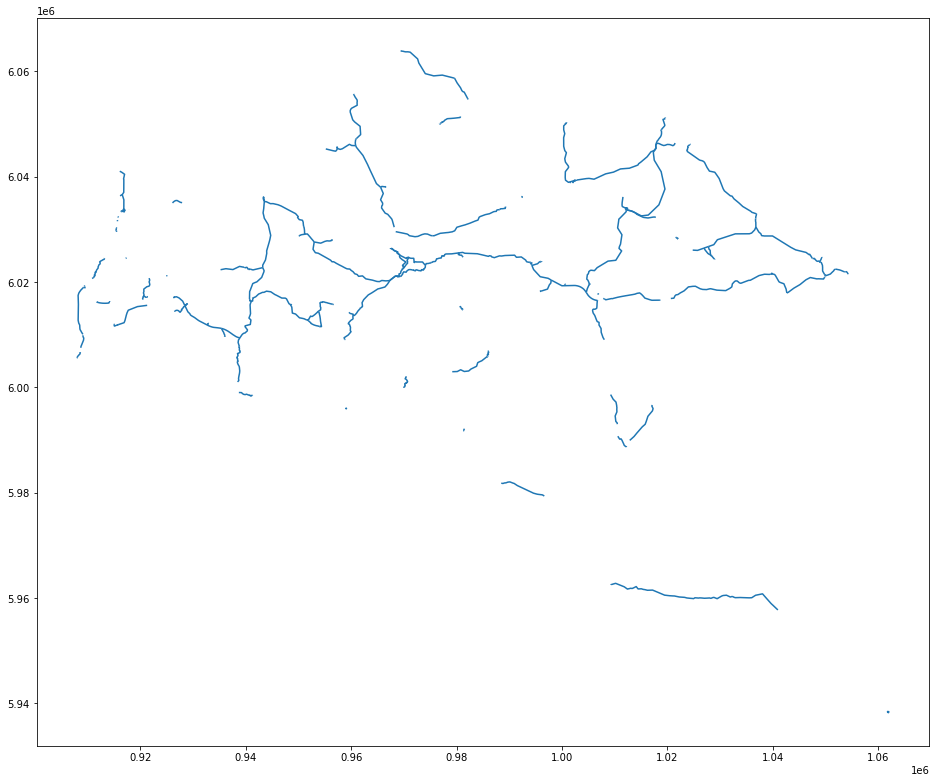

In [19]:
powerlines.plot(figsize=(16,16))

In [23]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_line osm WHERE power IS NOT NULL AND (power = 'line')"
jobman.create_new_pg_to_x(sql=sql, format='GPKG', filename=f'{country}_powerline.gpkg')

In [27]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,6ed1f8f4-d52d-4a76-9660-123dc6c857ad,Export PG,pg2x,"Wed, 09 Feb 2022 15:17:14 GMT",None,"Wed, 09 Feb 2022 15:17:20 GMT",42,Finished


In [23]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_point osm WHERE power IS NOT NULL"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerpoints = gpd.GeoDataFrame.from_postgis(sql, conn)

<AxesSubplot:>

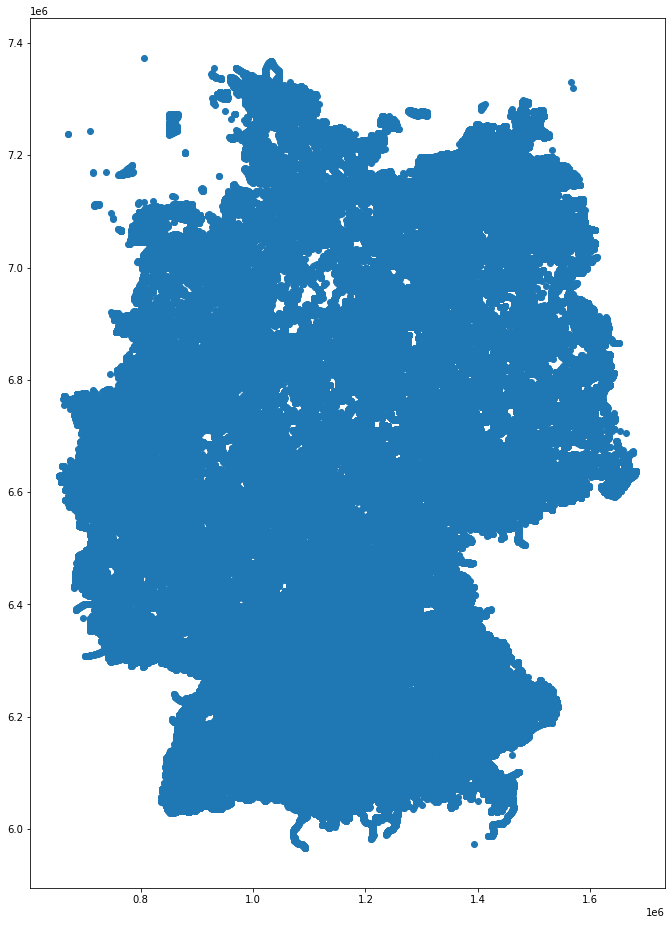

In [24]:
powerpoints.plot(figsize=(16, 16))

In [26]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_point osm WHERE power IS NOT NULL"
jobman.create_new_pg_to_x(sql=sql, format='GPKG', filename='{country}_powerpoint.gpkg')